In [1]:
#Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/gdrive/MyDrive/FOR NEXA/scripts')
from data_load import load_csv

 ***__Exploration des donnés___***:





In [4]:
#Chargement des données
path_file=('/content/gdrive/MyDrive/FOR NEXA/Stroke_Prediction/stroke_data.csv')
df=pd.read_csv(path_file)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Dimension de la dataset
print(f"le nombre d'observations est {df.shape[0]}")
print(f"le nombre de variables est {df.shape[1]}")

le nombre d'observations est 5110
le nombre de variables est 12


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


 Informations générales sur les données (df.info())
Le dataset contient 12 colonnes :

 * Une colonne d’identifiant : id (sera ignorée car elle ne contient aucune information utile pour la modélisation).

 * 10 colonnes de variables explicatives, représentant des caractéristiques démographiques ou cliniques des patients (comme l’âge, le sexe, l’IMC, le statut de fumeur, etc.).

 * 1 colonne cible : stroke, indiquant si le patient a eu un AVC (1) ou non (0).

Lors de l’inspection des données avec la méthode df.isnull().sum(), nous constatons que :

Le dataset contient quelques valeurs manquantes dans la colonne bmi (Indice de Masse Corporelle). Ce problème sera traité plus loin par une stratégie de remplacement appropriée.

Toutes les autres colonnes sont complètes.

Certaines colonnes sont de type catégoriel (object) et devront être encodées numériquement avant l'entraînement du modèle.



In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col}: {df[col].unique}")

gender: <bound method Series.unique of 0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: object>
ever_married: <bound method Series.unique of 0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object>
work_type: <bound method Series.unique of 0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object>
Residence_type: <bound method Series.unique of 0       Urban
1       Rural
2       Rural
3       Urban
4       Rural
        ...  
5105    Urban
5106    Urban
5107    Rural
5108    Rural
5109    Ur

In [9]:
for col in df.select_dtypes(include='float64').columns:
  print(f"{col}: {df[col].unique}")

age: <bound method Series.unique of 0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5110, dtype: float64>
avg_glucose_level: <bound method Series.unique of 0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64>
bmi: <bound method Series.unique of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>


In [10]:
df['stroke'].value_counts(normalize='True')*100

,proportion
stroke,
0,95.127202
1,4.872798


**Remarque sur la colonne cible:**

la colonne cible est déquilibrée, la majorité des cas sont non stroke, ce qui risuqe de destabiliser la prédiciton.Un modèle non performant peut tout simplement prédire toutes les valeurs des 0.

In [11]:
df['gender'].value_counts(normalize='True')*100

,proportion
gender,
Female,58.590998
Male,41.389432
Other,0.019569


Anallyse de la variable 'gender'
lors de l'inspection de la variable 'gender', on constate que la catégorie other est très rare (elle ne se présente qu'ne seule fois), sa présence est donce statistiquement négligeable et risque de perturber les modèles de classification...  

__Visualisation intelligente__

In [12]:
sys.path.append('/content/gdrive/MyDrive/FOR NEXA/scripts')
from plot import histplot, barplot, camembert, scatter

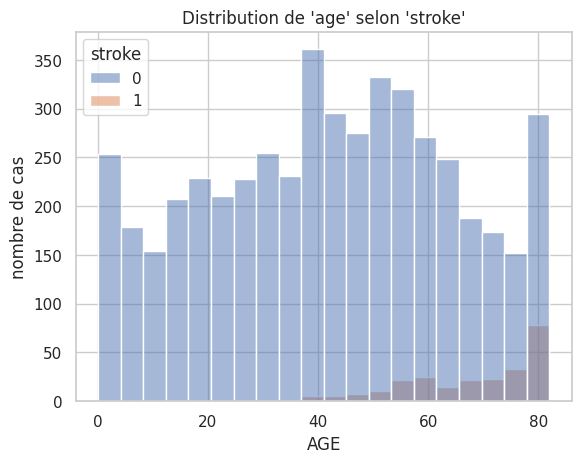

In [13]:
histplot(df, 'age', 'stroke', 'AGE')

Analyse de l'influence de l'age sur AVC:
En analysant l'hstogramme de l'age face à AVC, on cnstate que plus une personne est agée, plus le risque de l'AVC augmente.  L’âge jouera certainement un rôle important dans la performance des modèles prédictifs

In [14]:
df_age_inf_40=df[df['age']<=40]
df_age_inf_40.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,36338,Female,39.00,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
118,31720,Female,38.00,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
133,31563,Female,38.00,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
182,39912,Female,32.00,0,0,Yes,Private,Rural,76.13,29.9,smokes,1


In [15]:
df_age_sup_40=df[df['age']>=40]
df_age_sup_40.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
stroke_inf_40=df_age_inf_40['stroke'].value_counts()
stroke_sup_40=df_age_sup_40['stroke'].value_counts()

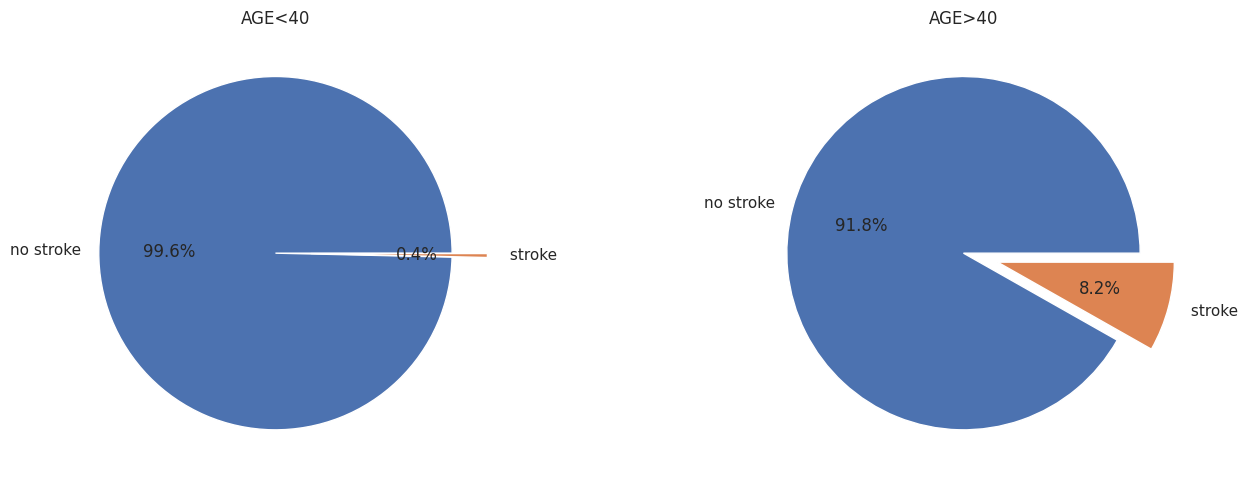

In [17]:
camembert(df_age_inf_40, df_age_sup_40,'stroke', 'AGE<40', 'AGE>40' )

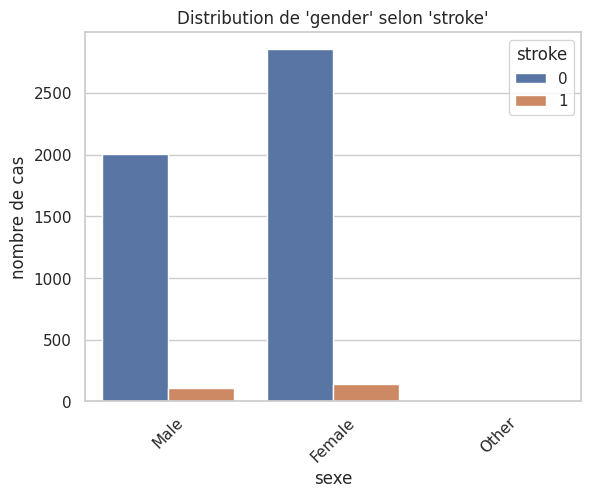

In [18]:
barplot(df, 'gender', 'stroke', 'sexe')

In [19]:
df_male=df[df['gender']=='Male']
df_female=df[df['gender']=='Female']

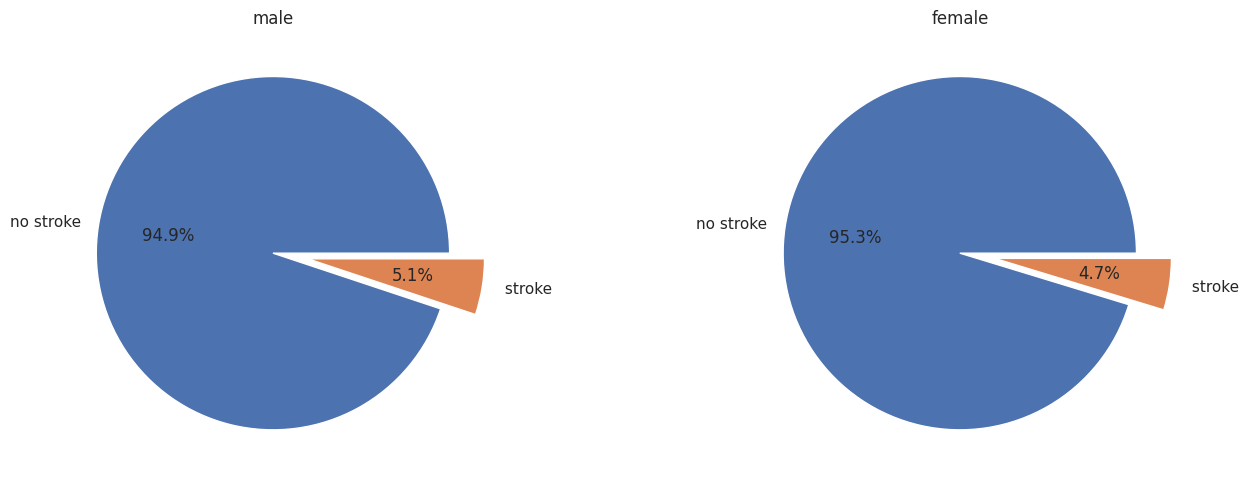

In [20]:
camembert(df_male, df_female, 'stroke', 'male', 'female')

**Analyse de l'influence du sexe:**
On constate que, même si la proportion de personnes de sexe masculin est légèrement supérieure à celle des femmes, la différence de fréquence des AVC entre les deux groupes reste faible.
 Cela suggère que le sexe n’a pas une grande influence sur la prédiction des AVC dans ce dataset.



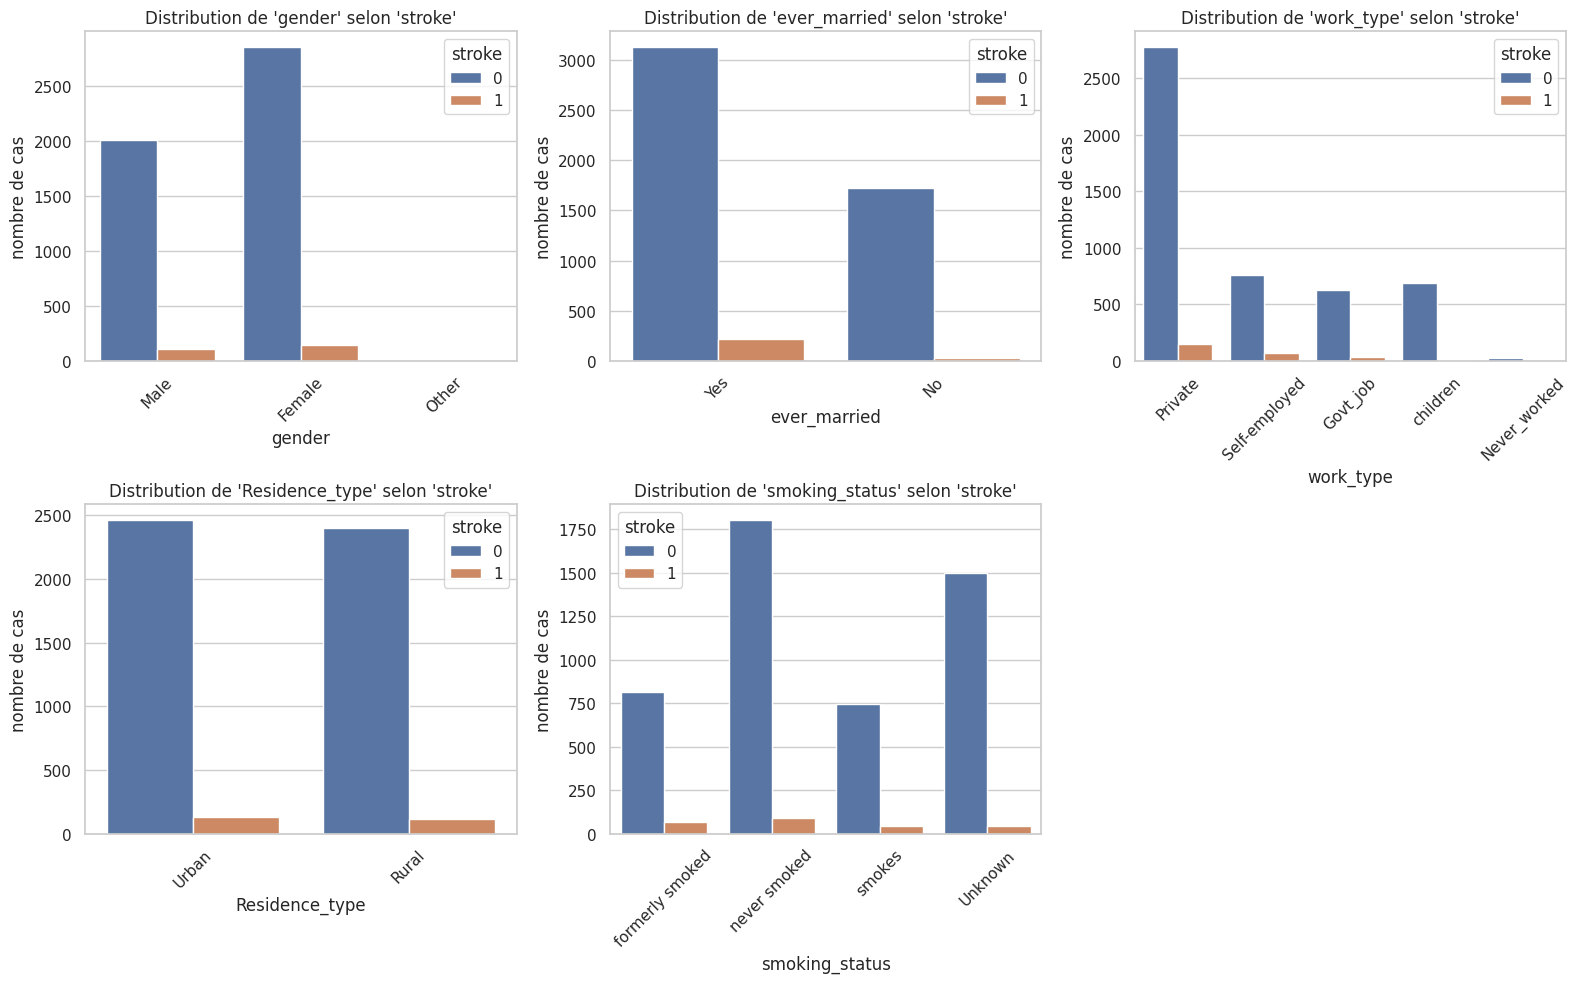

In [21]:
#Detection des colonne de type 'objet'
Object_features=[]
for col in df.select_dtypes(include='object'):
  Object_features.append(col)
#Relation avec la variable 'stroke'
plt.figure(figsize=(16,10))
for i, feature in enumerate(Object_features):
  plt.subplot(2, 3, i+1)
  barplot(df, feature, 'stroke', feature)
plt.tight_layout()

In [22]:
df_married=df[df['ever_married']=='Yes']
df_not_married=df[df['ever_married']=='No']


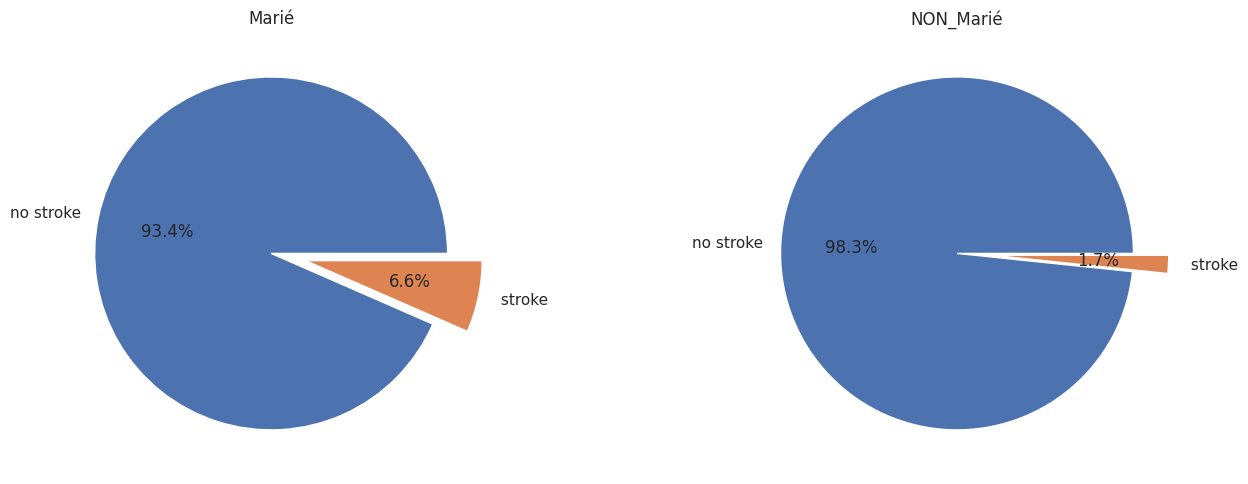

In [23]:
camembert(df_married, df_not_married, 'stroke', 'Marié', 'NON_Marié')

**Analyse de l'effet du marriage**

Les patients ayant déjà été mariés (Yes) semblent présenter un risque d’AVC légèrement supérieure à ceux n’ayant jamais été mariés (No).

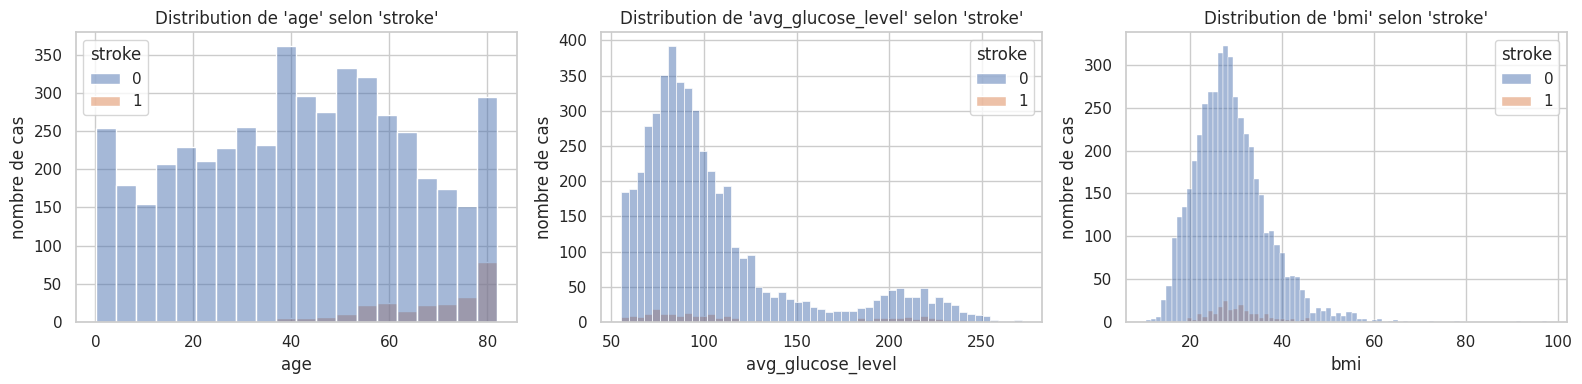

In [25]:
Float_features=[]
for col in df.select_dtypes(include='float64'):
  Float_features.append(col)
plt.figure(figsize=(16, 4))
for i ,feature in enumerate(Float_features):
   plt.subplot(1, len(Float_features), i+1)
   histplot(df, feature, 'stroke', feature )
plt.tight_layout()

In [26]:
df_diabétique=df[df['avg_glucose_level']>150]
df_non_diabétique=df[df['avg_glucose_level']<=150]


In [27]:
stroke_diabétique=df_diabétique['stroke'].value_counts()
stroke_non_diabétique=df_non_diabétique['stroke'].value_counts()


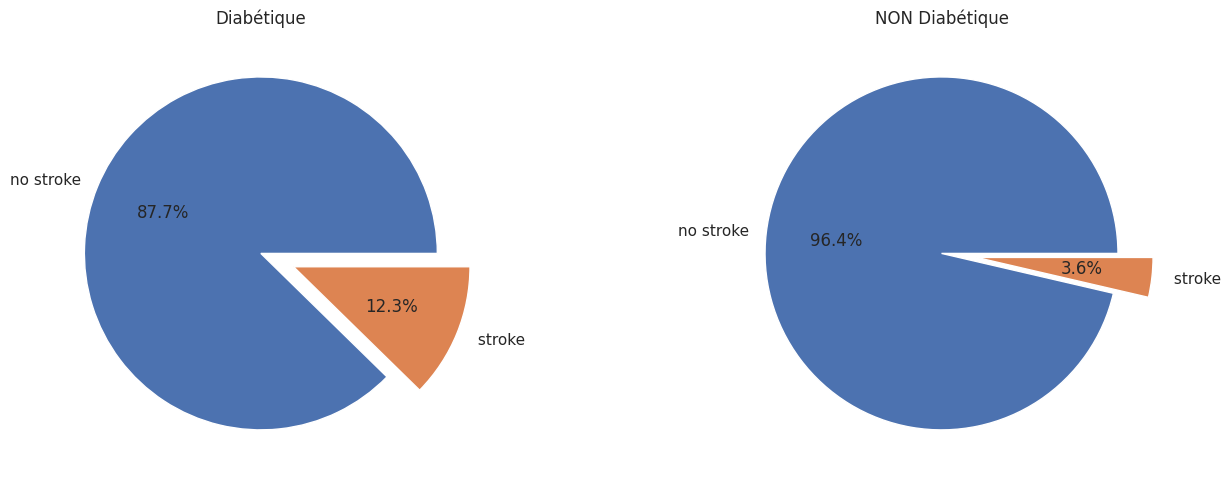

In [28]:
camembert(df_diabétique, df_non_diabétique, 'stroke', 'Diabétique', 'NON Diabétique')

**Analyse de l'effet de gluocose sur l'AVC**

L’analyse montre que les personnes diabétiques ont un risque d’AVC plus élevé que celles qui ne souffrent pas de diabète, ce qui est en accord avec les connaissances médicales établies.

**Analyse de BMI**

on le fait aprés le remplissage des valeurs manquantes

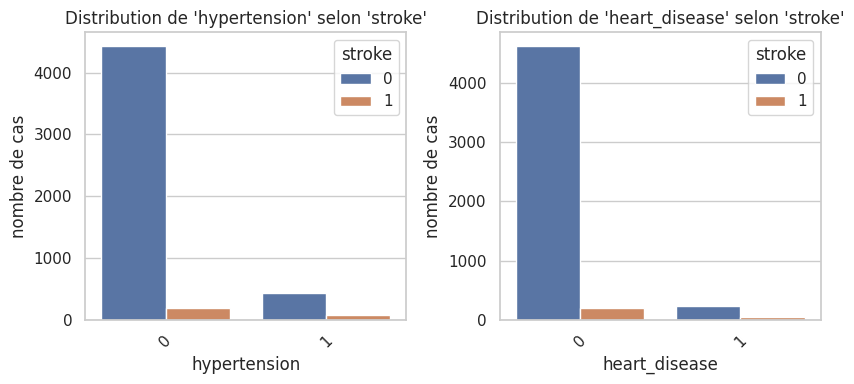

In [29]:
#Int_features
int_features=[]
for col in df.select_dtypes(include='int64'):
  int_features.append(col)
#Analyse des données de types 'int64'
plt.figure(figsize=(16,4))
for i, feature in enumerate(int_features):
  if feature=='id' or feature=='stroke':
    continue;
  else:
    plt.subplot(1, len(int_features), i+1)
    barplot(df,feature, 'stroke', feature )
plt.tight_layout()

In [30]:
df_non_hypertension=df[df['hypertension']==0]
df_hypertension=df[df['hypertension']==1]

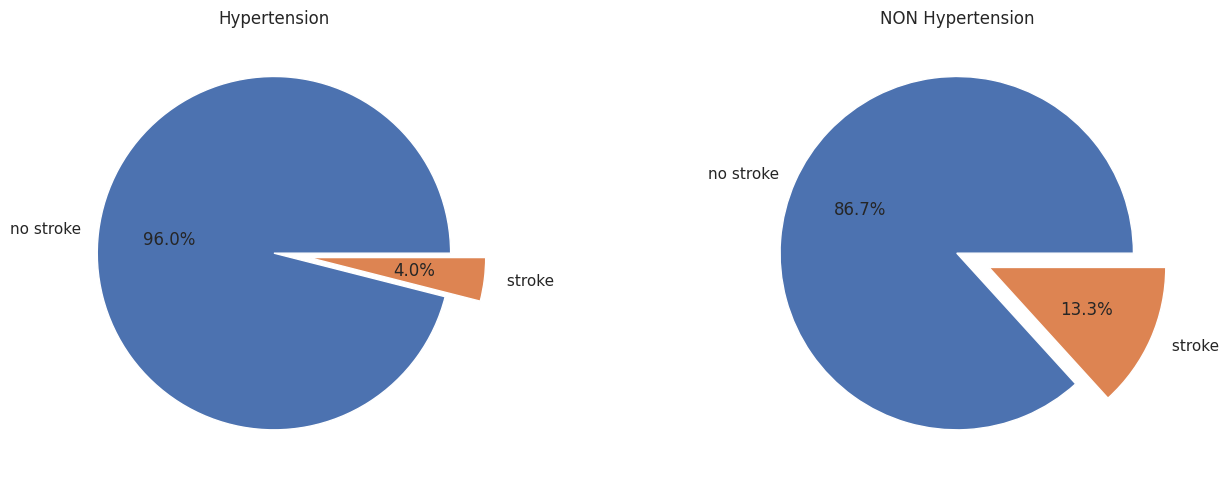

In [31]:
camembert(df_non_hypertension, df_hypertension, 'stroke', 'Hypertension', 'NON Hypertension')

In [32]:
df_non_heart_disease=df[df['heart_disease']==0]
df_heart_disease=df[df['heart_disease']==1]

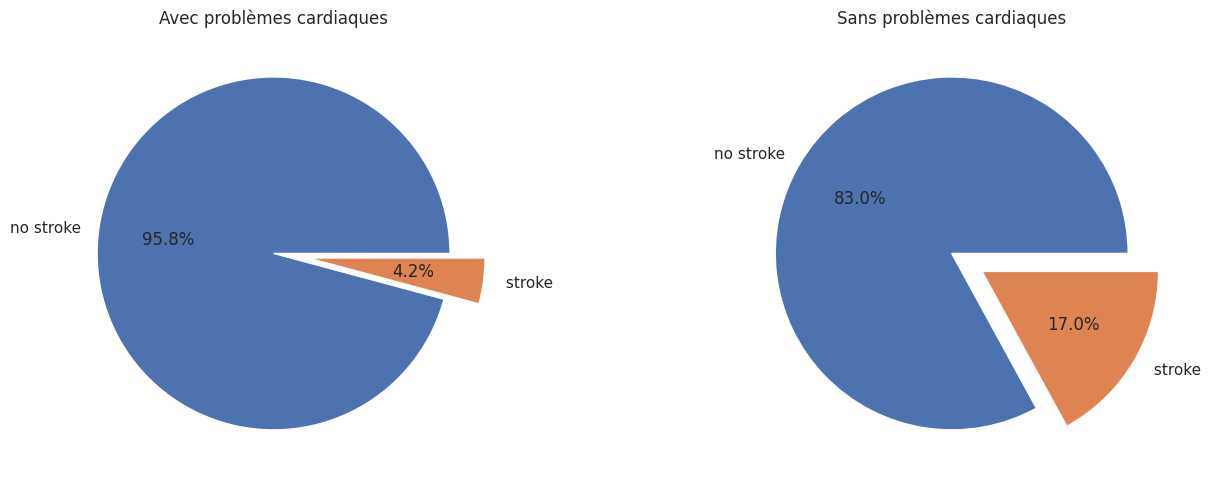

In [33]:
camembert(df_non_heart_disease, df_heart_disease, 'stroke', 'Avec problèmes cardiaques', 'Sans problèmes cardiaques' )

**Analyse de l'effet des problemes cardiaques**

Les personnes ayant des antécédents de maladies cardiaques présentent un risque plus élevé d’AVC que celles qui n’en ont pas.

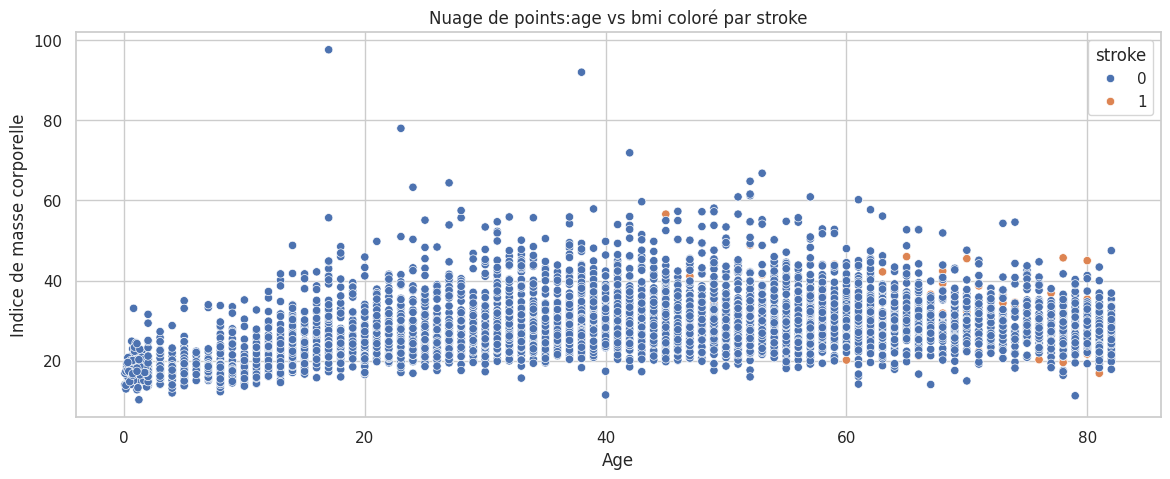

In [34]:
plt.figure(figsize=(14, 5))
scatter(df, 'age', 'bmi', 'stroke', 'Age', 'Indice de masse corporelle' )

**Effet combiné de l’âge et de l’IMC sur le risque d’AVC :**

Les premières observations suggèrent que les personnes âgées ayant un indice de masse corporelle (BMI) élevé semblent être plus susceptibles de subir un AVC que les autres.
Cependant, cette conclusion reste à confirmer, car certaines valeurs de la variable bmi sont encore manquantes et n'ont pas encore été imputées.



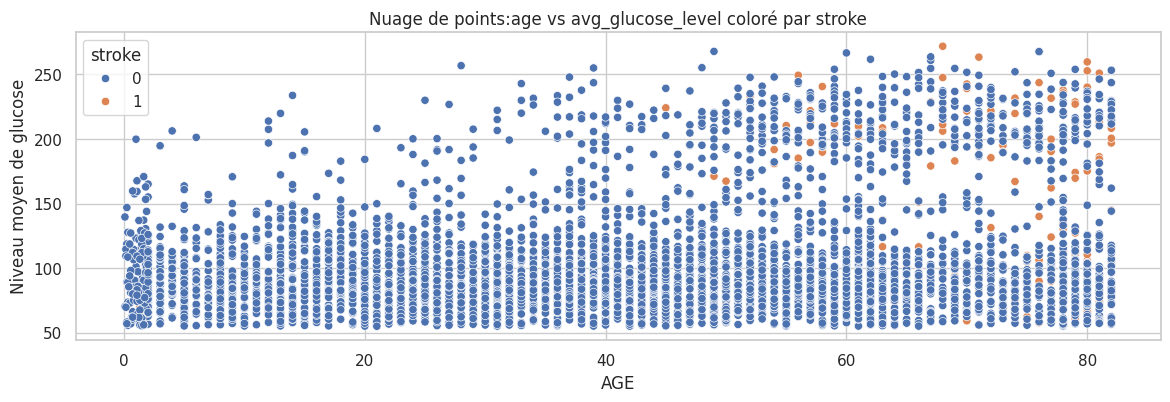

In [35]:
plt.figure(figsize=(14, 4))
scatter(df, 'age', 'avg_glucose_level', 'stroke', 'AGE', 'Niveau moyen de glucose' )

**Effet combiné de l'age et le niveau de glucose**

les personnes agées diabétiques sont les plus susceptibles à avoir des AVC

<Axes: >

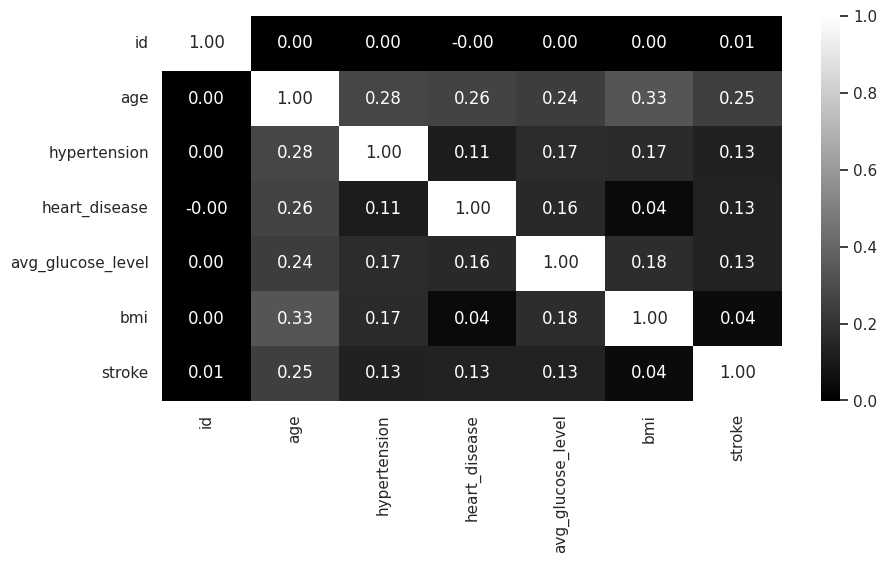

In [36]:
#Correleation des differentes variables avec stroke
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(numeric_only=True), fmt=".2f", annot=True, cmap='gray')


**Analyse de la carte de corrélation**

Analyse comparative des variables numériques :
Parmi les variables numériques, l’âge apparaît comme le facteur ayant le plus d’impact sur l’occurrence des AVC, tandis que l’indice de masse corporelle (BMI) semble être le moins influent dans notre analyse exploratoire.